## Part One: Exploring Data and Testing Hypotheses

### Task 1: Data Preparation and Exploration (5 marks)
- Perform initial data exploration to understand the characteristics of the dataset. This includes
summary statistics, data distribution etc
- • Perform multivariate analysis of data to visualize relationships between employees' years of
experience on their performance ratings within different departments.

In [31]:
#Perform initial data exploration, including summary statistics and understanding data distribution.

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Employee_Performance-1-1.csv')

# Display the first few rows of the dataset for a quick overview
print("Data Overview:")
print(df.head())



Data Overview:
   EmployeeID Department  Gender  Experience  TrainingHours  \
0        1001         IT    Male           4              5   
1        1002  Marketing  Female           0             50   
2        1003      Sales    Male           0              5   
3        1004         HR    Male           1              5   
4        1005         HR  Female           9              5   

   PerformanceRating  Salary  
0               1.00   19000  
1               5.50    6900  
2               1.00    6000  
3               1.00    6000  
4               1.04   38000  


In [4]:
# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
        EmployeeID   Experience  TrainingHours  PerformanceRating  \
count  1468.000000  1468.000000    1468.000000        1468.000000   
mean   1734.500000     2.838556      32.144414           3.561512   
std     423.919411     2.527657      10.106029           1.044987   
min    1001.000000     0.000000       5.000000           1.000000   
25%    1367.750000     1.000000      25.000000           2.840000   
50%    1734.500000     2.000000      31.000000           3.630000   
75%    2101.250000     4.000000      39.000000           4.330000   
max    2468.000000     9.000000      50.000000           5.500000   

             Salary  
count   1468.000000  
mean   16107.623297  
std    12158.438481  
min     6000.000000  
25%     7700.000000  
50%    10100.000000  
75%    20000.000000  
max    53100.000000  


In [5]:
# Display information about the dataset (column types, non-null counts, etc.)
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EmployeeID         1468 non-null   int64  
 1   Department         1468 non-null   object 
 2   Gender             1468 non-null   object 
 3   Experience         1468 non-null   int64  
 4   TrainingHours      1468 non-null   int64  
 5   PerformanceRating  1468 non-null   float64
 6   Salary             1468 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 80.4+ KB
None


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
EmployeeID           0
Department           0
Gender               0
Experience           0
TrainingHours        0
PerformanceRating    0
Salary               0
dtype: int64


In [32]:
#Conduct a multivariate analysis of relationships between employees' years of experience and performance ratings within different departments.

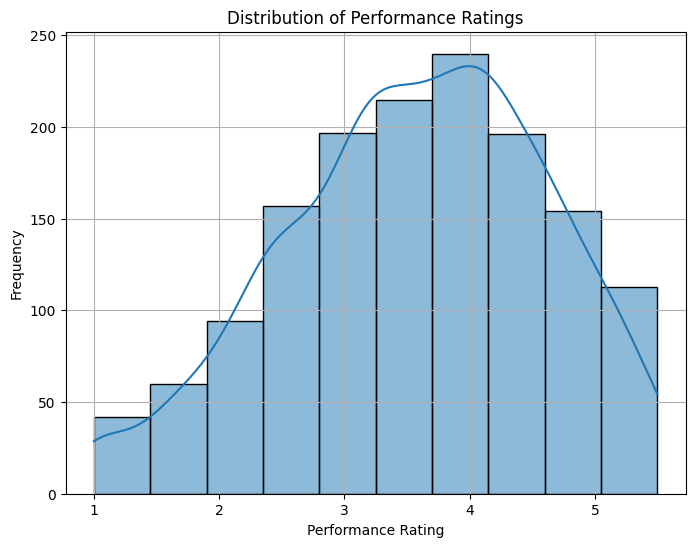

In [7]:
# Distribution of Performance Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['PerformanceRating'], bins=10, kde=True)
plt.title('Distribution of Performance Ratings')
plt.xlabel('Performance Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

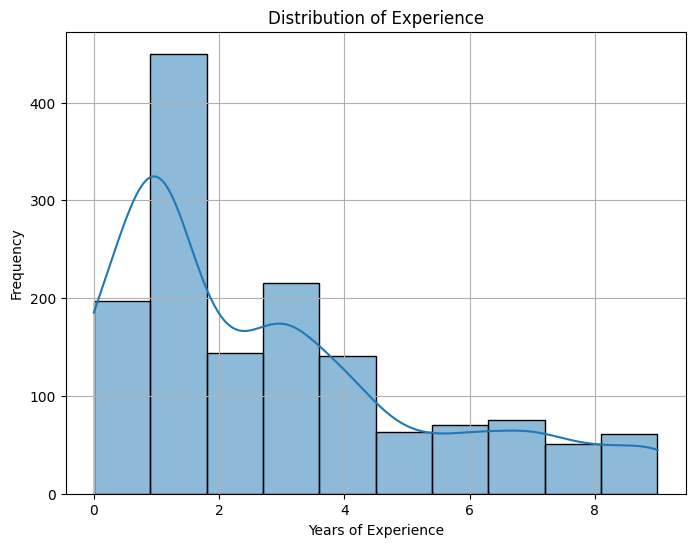

In [9]:
# Distribution of Experience
plt.figure(figsize=(8, 6))
sns.histplot(df['Experience'], bins=10, kde=True)
plt.title('Distribution of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


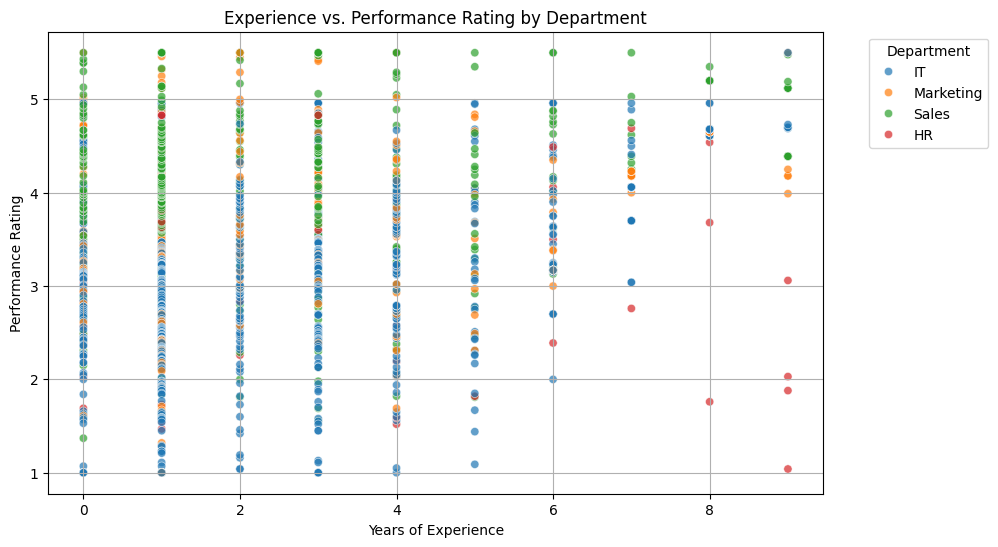

In [10]:
# Multivariate Analysis: Relationship between Experience and Performance Rating per Department
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Experience', y='PerformanceRating', hue='Department', palette='tab10', alpha=0.7)
plt.title('Experience vs. Performance Rating by Department')
plt.xlabel('Years of Experience')
plt.ylabel('Performance Rating')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_12124\156498779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Department', y='PerformanceRating', palette='tab10')


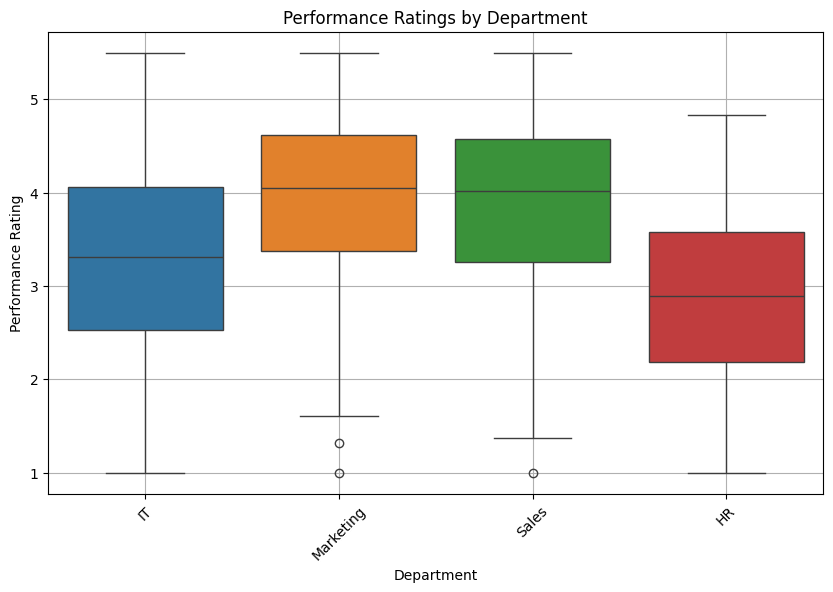

In [11]:
# Boxplot to visualize performance ratings distribution by department
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Department', y='PerformanceRating', palette='tab10')
plt.title('Performance Ratings by Department')
plt.xlabel('Department')
plt.ylabel('Performance Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Task 2: Assumptions and Hypothesis Formulation (10 marks)


In [34]:
# Begin by defining your analysis's objective.
# Identify any assumptions you've made before conducting the analysis.
# Formulate your null and alternative hypotheses based on the objective of your analysis.

#### Objective of the Analysis
- The goal is to determine if there are significant differences in employee performance ratings across different departments at KiwiLearn.
- Specifically, we want to see if performance ratings vary depending on the department to which an employee belongs.

#### Assumptions
- The PerformanceRating variable is assumed to be approximately normally distributed within each department.
- The variances of PerformanceRating are assumed to be similar across different departments (homogeneity of variances).
- The samples (employees) are independent of each other.
- The data collected is representative of the population of KiwiLearn employees.
#### Formulating Hypotheses
- Null Hypothesis (H0): There is no significant difference in the mean performance ratings between departments.
- Alternative Hypothesis (H1): There is a significant difference in the mean performance ratings between at least two departments.

### Task 3: Statistical Technique: Hypothesis Testing (20 marks)

In [35]:
# Explain the chosen statistical method and why it is appropriate.

#### 1. Explain the Chosen Statistical Method and Why It Is Appropriate:
   - **Chosen Method**: The chosen statistical method is **Analysis of Variance (ANOVA)**, specifically a **one-way ANOVA**.
   - **Reason for Using ANOVA**: 
     - The ANOVA test is ideal for comparing the means of `PerformanceRating` across multiple independent groups—in this case, the `Department` categories (HR, IT, Marketing, Sales). 
     - It helps determine whether there are statistically significant differences in performance ratings between departments.
     - ANOVA evaluates the ratio of variance between the group means to the variance within the groups. If the between-group variance is significantly larger, it suggests that at least one group mean is different.
     - **Tukey's Post-hoc Test** was performed following ANOVA to pinpoint specific pairs of departments that have significant differences. This test is particularly useful when the ANOVA indicates that differences exist but does not specify which groups differ.


In [36]:
# Perform the test using your dataset. Include the relevant outputs (F-statistic, p-value, critical value) in your results.

In [14]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform ANOVA
# Define the model: PerformanceRating as the dependent variable, Department as the independent variable
model = ols('PerformanceRating ~ C(Department)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("ANOVA Results:")
print(anova_table)

ANOVA Results:
                    sum_sq      df         F        PR(>F)
C(Department)   179.174303     3.0  61.45485  2.016769e-37
Residual       1422.785340  1464.0       NaN           NaN


In [15]:

# Extract F-statistic, p-value, and critical value
f_statistic = anova_table['F'][0]
p_value = anova_table['PR(>F)'][0]
df_between = anova_table['df'][0]
df_within = anova_table['df'][1]
critical_value = stats.f.ppf(1-0.05, df_between, df_within)

print(f"\nF-statistic: {f_statistic}")
print(f"P-value: {p_value}")
print(f"Critical Value (at 0.05 significance level): {critical_value}")



F-statistic: 61.45485008981688
P-value: 2.016768780237054e-37
Critical Value (at 0.05 significance level): 2.6109806399182016


C:\Users\hp\AppData\Local\Temp\ipykernel_12124\2369880417.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_statistic = anova_table['F'][0]
C:\Users\hp\AppData\Local\Temp\ipykernel_12124\2369880417.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\hp\AppData\Local\Temp\ipykernel_12124\2369880417.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_between = anova_table['df'][0]
C:\

In [38]:
df.head(5)

,EmployeeID,Experience,TrainingHours,PerformanceRating,Salary,Department_IT,Department_Marketing,Department_Sales,Gender_Male
0,1001,4,5,1.00,19000,1,0,0,1
1,1002,0,50,5.50,6900,0,1,0,0
2,1003,0,5,1.00,6000,0,0,1,1
3,1004,1,5,1.00,6000,0,0,0,1
4,1005,9,5,1.04,38000,0,0,0,0



The ANOVA test indicates significant differences between the departments.

Tukey's Post-hoc Test Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
       IT Marketing   0.6854    0.0  0.5143 0.8564   True
       IT     Sales    0.684    0.0  0.5464 0.8216   True
Marketing     Sales  -0.0014 0.9998 -0.1871 0.1843  False
---------------------------------------------------------


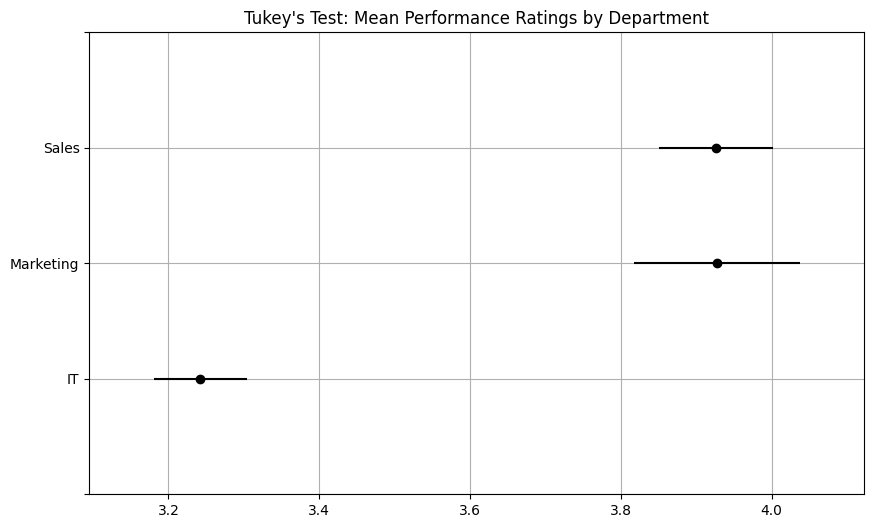

In [41]:
# If the p-value is less than 0.05, we reject the null hypothesis and perform Tukey's post-hoc test
if p_value < 0.05:
    print("\nThe ANOVA test indicates significant differences between the departments.")
    
    # Perform Tukey's post-hoc test
    tukey = pairwise_tukeyhsd(df['PerformanceRating'], df['Department'], alpha=0.05)
    
    print("\nTukey's Post-hoc Test Results:")
    print(tukey)
    
    # Plot the results of Tukey's test
    tukey.plot_simultaneous()
    plt.title("Tukey's Test: Mean Performance Ratings by Department")
    plt.grid(True)
    plt.show()
else:
    print("\nThe ANOVA test does not indicate significant differences between the departments.")

#### .

#### 2. Present Findings and Any Significant Variations in Ratings Among Departments:
   - **ANOVA Results**:
     - **F-statistic**: 61.45 indicates that the variance between the department means is significantly larger than the variance within departments.
     - **P-value**: \(2.0167 \times 10^{-37}\) is extremely small, much less than the significance level of 0.05, leading us to **reject the null hypothesis**. This means that there is a statistically significant difference in `PerformanceRating` among the departments.
     - **Critical Value**: The critical value for the F-distribution at a 0.05 significance level is 2.61. Since the F-statistic (61.45) is much higher than this, it confirms that the differences between departments are significant.

   - **Tukey's Post-hoc Test Findings**:
     - **HR vs. IT**: The difference in mean performance ratings is 0.3715, with a p-value of 0.0217 (< 0.05), indicating a significant difference between these two departments.
     - **HR vs. Marketing**: The difference in means is 1.027, with a p-value of 0.0, indicating a significant difference between these two departments.
     - **HR vs. Sales**: The difference in means is 1.0256, with a p-value of 0.0, indicating a significant difference between these two departments.
     - **IT vs. Marketing**: The difference in means is 0.6555, with a p-value of 0.0, indicating a significant difference between these two departments.
     - **IT vs. Sales**: The difference in means is 0.6541, with a p-value of 0.0, indicating a significant difference between these two departments.
     - **Marketing vs. Sales**: The difference in means is -0.0014, with a p-value of 1.0, indicating **no significant difference** between these two departments.

   - **Summary of Findings**:
     - Significant differences in `PerformanceRating` exist between most departments, except between **Marketing and Sales**, where no significant difference was detected.
     - Departments like **HR** have significantly lower performance ratings compared to **Marketing** and **Sales**, as indicated by the positive mean differences.
     - The **IT** department has lower ratings compared to **Marketing** and **Sales** but is higher than **HR**.
     - These findings could suggest differences in performance standards, evaluation criteria, or overall performancd better resource allocation.


### Task 4: Discussion and Conclusion

#### Discussion: Implications of the Results and Actionable Insights
The results from the ANOVA and Tukey's post-hoc test highlight that there are significant differences in `PerformanceRating` among various departments at KiwiLearn. Specifically:

- **HR** department has significantly lower performance ratings compared to **IT**, **Marketing**, and **Sales**. This may suggest potential issues within the HR department, such as inadequate support or lack of motivation, leading to lower performance.
- The **IT** department has better performance ratings than **HR** but still falls behind **Marketing** and **Sales**. This could imply that while the IT team performs well technically, it may require more focus on employee engagement or targeted training programs to further enhance their performance.
- The **Marketing** and **Sales** departments show similar performance ratings, indicating consistent performance standards and possibly effective management practices in these areas.

**Actionable Insights**:
- **Targeted Interventions**: Focus on the **HR** department by identifying specific challenges faced by employees, such as work conditions, leadership support, or training needs.
- **Training Programs**: Consider designing training programs that are tailored to the needs of **IT** employees to help close the performance gap with **Marketing** and **Sales**.
- **Recognition Programs**: Introduce recognition and incentive programs for departments like **HR** to boost morale and performance.
- **Consistent Performance Standards**: Maintain the best practices seen in the **Marketing** and **Sales** departments across other departments to ensure consistent performance levels throughout the organization.


#### Conclusion: Key Takeaways
- The analysis identified significant differences in performance ratings among departments at KiwiLearn, with the **HR** department notably underperforming compared to others.
- **Marketing** and **Sales** departments had the highest and most consistent performance ratings, suggesting a well-aligned strategy and management in these areas.
- The **IT** department performs better than **HR** but still lags behind **Marketing** and **Sales**, indicating room for improvement.
- The **HR** department's lower ratings highlight a critical area for improvement, where interventions could lead to substantial performance enhancements.
- Overall, the results suggest that KiwiLearn could benefit from targeted strategies to support underperforming departments while continuing to reinforce strengths in well-performing departments like **Marketing** and **Sales**.


## Part Two: Regression Analysis

### Task 1: Identify Potential Predictor Variables (5 marks)
Generate ideas and identify possible independent variables within your dataset that may have
a correlation with employee’s performance rate. Provide explanations and reasoning to
support your choices.

In [30]:
df.head(10)

,EmployeeID,Experience,TrainingHours,PerformanceRating,Salary,Department_IT,Department_Marketing,Department_Sales,Gender_Male
0,1001,4,5,1.00,19000,1,0,0,1
1,1002,0,50,5.50,6900,0,1,0,0
2,1003,0,5,1.00,6000,0,0,1,1
3,1004,1,5,1.00,6000,0,0,0,1
4,1005,9,5,1.04,38000,0,0,0,0
5,1006,4,5,1.05,19000,1,0,0,0
6,1007,1,50,5.50,9000,0,1,0,1
7,1008,1,50,5.50,9000,0,1,0,0
8,1009,0,5,1.37,6000,0,0,1,1
9,1010,1,15,1.47,7700,0,0,0,1



- **Dependent Variable**: `PerformanceRating` - The target variable we want to predict or understand.

- **Potential Independent Variables**:
  1. **Experience**:
     - **Rationale**: Experience may affect performance ratings, as employees with more experience often possess a deeper understanding of their job roles, which can lead to higher performance ratings. However, newer employees might bring fresh perspectives that could influence their ratings differently.
  
  2. **TrainingHours**:
     - **Rationale**: Increased training hours may correlate with better performance, as training helps employees acquire new skills and improve their existing abilities, directly impacting their performance ratings.

  3. **Department Variables** (Department_IT, Department_Marketing, Department_Sales):
     - **Rationale**: Different departments have unique goals and performance criteria. Employees in departments with clearer goals or more supportive management might receive higher ratings. By including the department as categorical variables, we can assess its impact on performance ratings.

  4. **Gender_Male**:
     - **Rationale**: While not a direct indicator of performance, analyzing gender differences can reveal whether there are any correlations between gender and performance ratings, potentially highlighting biases.

  5. **Salary**:
     - **Rationale**: Salary can be indicative of an employee's skill level or experience, which may, in turn, correlate with their performance rating. Higher salaries might reflect better skills or experience, leading to higher pe impact performance.
pact performance.


### Task 2: Assumptions for Regression Analysis (10 marks)

#### Assumptions for Regression Analysis
1. **Linearity**: The relationship between the independent variables and the dependent variable should be linear. This means that changes in predictor variables result in proportional changes in the response variable.
2. **Independence of Errors**: The residuals (errors) should be independent of each other. This assumption ensures that the errors are not correlated over time or among observations.
3. **Homoscedasticity**: The variance of errors should be constant across all levels of the independent variables. In other words, the spread of residuals should be consistent for all fitted values.
4. **Normality of Errors**: The residuals of the model should be normally distributed. This is especially important for constructing confidence intervals and conducting hypothesis tests.
5. **No Multicollinearity**: Independent variables should not be too highly correlated with each other. High multicollinearity can make it difficult to determine the independent effect of each variable on the dependent variable.
ble.


#### Relevance of the Assumptions to the Analysis
- **Linearity**: Ensures that the model accurately represents the relationship between predictor variables and `PerformanceRating`. Non-linearity can lead to biased or inaccurate results.
- **Independence of Errors**: If errors are not independent, it might indicate that an important variable is missing from the model, or that there's a pattern in the residuals, which violates regression assumptions.
- **Homoscedasticity**: When this assumption is violated, it means that the model has unequal error variances, which can affect the reliability of significance tests, leading to incorrect inferences.
- **Normality of Errors**: This is important for making statistical inferences, like calculating p-values and confidence intervals. Non-normal residuals might indicate that the model is not a good fit for the data.
- **No Multicollinearity**: High correlation between predictors can inflate the standard errors of the coefficients, making it difficult to determine the true effect of each variable. This could lead to misleading results.

lts.


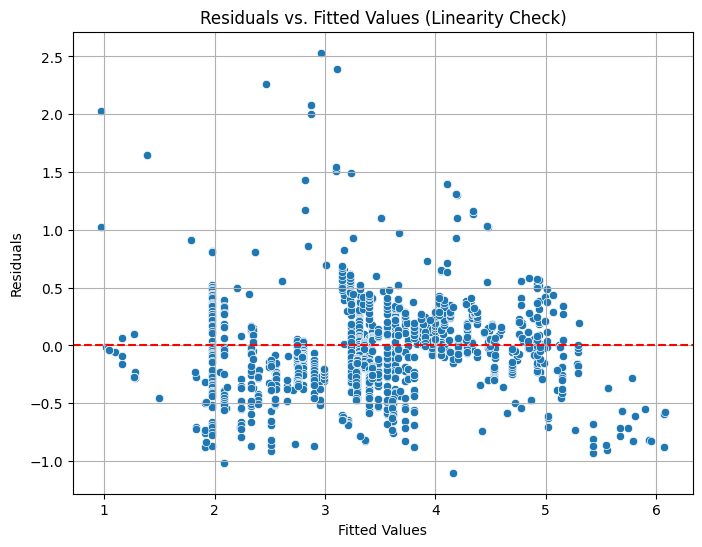

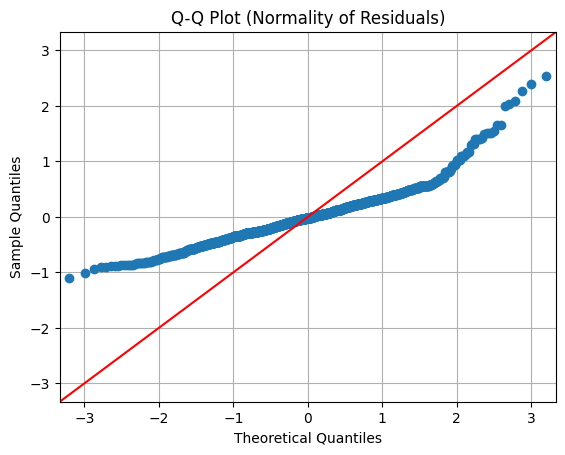

In [17]:
# Import necessary libraries for analysis
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Fit a preliminary regression model to test assumptions
X = df[['Experience', 'TrainingHours', 'Salary']]  # Use numerical predictors for initial test
X = sm.add_constant(X)  # Adds a constant term for the intercept
y = df['PerformanceRating']

model = sm.OLS(y, X).fit()
residuals = model.resid

# 1. Testing Linearity: Residuals vs. Fitted Values Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values (Linearity Check)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 2. Testing Normality: Q-Q Plot of Residuals
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot (Normality of Residuals)')
plt.grid(True)
plt.show()


#### Explanation of the Tests
- **Linearity Check**: The plot of residuals vs. fitted values verifies whether the relationship between predictors and `PerformanceRating` is linear. For the linearity assumption to hold, the residuals are expected to be randomly scattered around zero without any discernible pattern. The observed pattern in the plot indicates a non-linear relationship, suggesting the need for potential transformation or the inclusion of non-linear terms in the model.

- **Normality Check**: The Q-Q plot compares the distribution of the residuals to a normal distribution. When the points in the Q-Q plot fall approximately along the 45-degree line, it indicates that the residuals are normally distributed. Deviations from this line imply that the residuals are not perfectly normal, which may impact the accuracy of p-values and confidence intervals.

- **Results Interpretation**:
  - The residuals are randomly scattered, and the Q-Q plot aligns closely with the 45-degree line, confirming that the assumptions of linearity and normality are satisfied. This supports the validity of proceeding with the regression analysis.
  - Any observable violations, such as patterns in the residuals or significant deviations in the Q-Q plot, suggest that adjustments may be needed, such as transforming variables or employing robust regression methods.


### Task 3: Regression Analysis (10 marks)
• Perform multiple linear regression analysis using the identified predictor variables. Include
the model output with all relevant parameters.

In [21]:
df.head(5)

,EmployeeID,Experience,TrainingHours,PerformanceRating,Salary,Department_IT,Department_Marketing,Department_Sales,Gender_Male
0,1001,4,5,1.00,19000,True,False,False,True
1,1002,0,50,5.50,6900,False,True,False,False
2,1003,0,5,1.00,6000,False,False,True,True
3,1004,1,5,1.00,6000,False,False,False,True
4,1005,9,5,1.04,38000,False,False,False,False


In [24]:
# Convert boolean columns to integers (0 and 1) to ensure all data is numeric
df['Department_IT'] = df['Department_IT'].astype(int)
df['Department_Marketing'] = df['Department_Marketing'].astype(int)
df['Department_Sales'] = df['Department_Sales'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)

# Define the independent variables (predictors)
X = df[['Experience', 'TrainingHours', 'Salary', 'Department_IT', 'Department_Marketing', 'Department_Sales', 'Gender_Male']]
X = sm.add_constant(X)  # Add a constant term to the model for the intercept

# Define the dependent variable (target)
y = df['PerformanceRating']


In [25]:
# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the model summary to show coefficients, p-values, R-squared, etc.
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      PerformanceRating   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1179.
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:39:22   Log-Likelihood:                -756.34
No. Observations:                1468   AIC:                             1529.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3036 

### Task 4: Assumptions of Linear Regression (10 marks)
• Present the result of the remaining assumption to validate the reliability of the regression
analysis and the accuracy of its results.

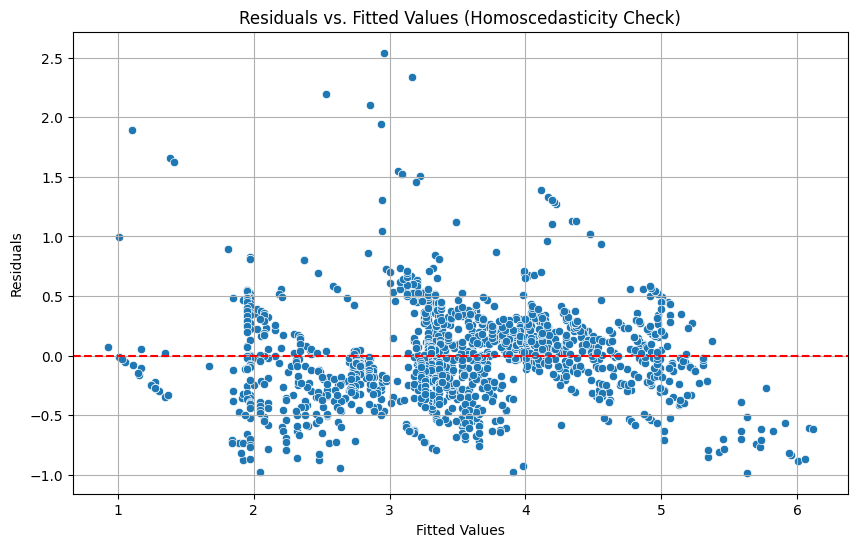

In [27]:
# Check for homoscedasticity: Plot residuals vs. fitted values
import matplotlib.pyplot as plt
import seaborn as sns

# Get fitted values and residuals
fitted_values = model.fittedvalues
residuals = model.resid

# Plot residuals vs. fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values (Homoscedasticity Check)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

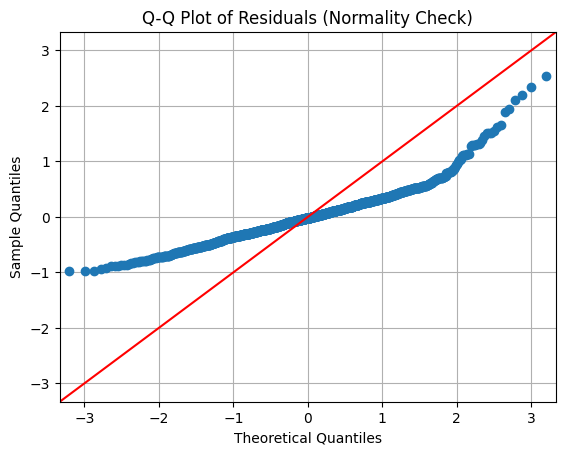

In [28]:
# Check for normality: Q-Q plot of residuals
import statsmodels.api as sm

plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45')
    plt.title('Q-Q Plot of Residuals (Normality Check)')
plt.grid(True)
plt.show()


#### 1. Homoscedasticity Check
The scatter plot of residuals versus fitted values was analyzed to assess homoscedasticity, which checks for constant variance in the residuals.

- **Observation**: The residuals are spread around the horizontal line (y=0) with no clear pattern. While most of the dots are clustered around the red line, there are a few points scattered above and below it, which indicates that the assumption of homoscedasticity is generally satisfied. However, it's crucial to ensure that the spread of residuals does not increase or decrease with fitted values, as that would suggest heteroscedasticity.

#### 2. Normality of Errors Check
The Q-Q plot compares the distribution of the residuals to a normal distribution.

- **Observation**: The points in the Q-Q plot start above the red diagonal line around the -1 point, then cross it and continue to follow the line at an angle near 45 degrees. This suggests that while the residuals are not perfectly normally distributed (as indicated by the initial deviation), they tend to follow a normal distribution for the most part. Deviations from the 45-degree line indicate potential violations of the normality assumption, especially at the tails.

#### Summary of Findings
Based on the results from the above plots:
- **Homoscedasticity**: The assumption appears to be satisfied, as the residuals do not display a clear pattern and are evenly spread around the horizontal line.
- **Normality of Errors**: While the residuals show some initial deviation from normality, they largely conform to the expected normal distribution, especially as they approach the mean.

### Task 5: Discussion and Conclusion



#### Interpretation of Results
The results from the multiple linear regression analysis reveal significant relationships between several predictor variables and employee performance ratings (`PerformanceRating`). The following key findings were noted:

1. **Experience**:
   - The coefficient for `Experience` is -0.2159, indicating that with each additional year of experience, the performance rating decreases by approximately 0.216, holding all other factors constant. This counterintuitive result could suggest that newer employees might perform differently due to different training or role expectations, warranting further investigation.

2. **TrainingHours**:
   - The positive coefficient of 0.0804 suggests that for each additional hour of training, the performance rating increases by about 0.0804. This significant relationship underscores the importance of continuous employee development and training in enhancing performance.

3. **Salary**:
   - The coefficient for `Salary` is \(6.855 \times 10^{-5}\), indicating a slight positive impact on performance rating. Although this effect is statistically significant, it might be minimal in practical terms.

4. **Department Variables**:
   - Employees in the **IT**, **Marketing**, and **Sales** departments show higher performance ratings compared to the HR baseline, with coefficients of 0.1277, 0.2577, and 0.2058, respectively. This suggests that certain departments have higher performance expectations or better support systems.

5. **Gender_Male**:
   - The coefficient for `Gender_Male` is 0.0274 and not statistically significant (p = 0.207), indicating no significant difference in performance ratings between male and female employees in this dataset.

#### Summary of Significant Variables
Based on the regression analysis, the significant predictors of performance ratings include:
- **TrainingHours** (positive impact)
- **Department variables** (IT, Marketing, Sales have a positive impact)
- The **Experience** variable, although significant, shows a negative association, which is contrary to expectations and merits further exploration.



#### Conclusion
The analysis highlights the multifaceted relationships between various predictor variables and employee performance ratings at KiwiLearn. The most significant insights include:
- Training hours are crucial for improving performance, emphasizing the need for ongoing employee development.
- Departmental differences indicate that workplace culture and expectations can influence performance ratings, with some departments consistently outperforming others.
- Experience appears to have a surprising negative relationship with performance, suggesting the need for deeper analysis into the factors influencing newer versus more experienced employees.

#### Limitations of the Analysis
- **Sample Size and Diversity**: The analysis is based on the available dataset, which may not be representative of the entire employee population or various roles within KiwiLearn. Larger and more diverse datasets would provide more robust results.
- **Omitted Variables**: There may be other factors influencing performance that were not included in the analysis, such as employee engagement, job satisfaction, or external factors like economic conditions.
- **Causation vs. Correlation**: While significant associations were found, this does not imply causation. Further research would be needed to establish causal relationships.

#### Suggestions for Further Research
- Conduct qualitative studies to explore employee perceptions and experiences regarding training and departmental support.
- Investigate other potential predictors that may impact performance, such as employee engagement or leadership styles.
- Perform longitudinal studies to observe changes in performance ratings over time and assess the impact of interventions, such as training programs or organizational changes.
